In [1]:
!pip install mat73
!pip install openpyxl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mat73

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.figure
from pathlib import Path
import os
import wave
import keras
import seaborn as sns
import librosa
import soundfile as sf
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from numpy import mean
from numpy import std
from numpy import dstack
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.utils import to_categorical
from scipy.io import wavfile
from tqdm import tqdm
import tensorflow as tf
import scipy.io
import tensorflow.keras.backend as K
from keras.callbacks import EarlyStopping
from tensorflow.python.keras.models import Sequential,Input,Model
from keras.layers import Dense
from keras.layers import Conv2D, MaxPooling2D,BatchNormalization,LeakyReLU
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import TensorDataset, DataLoader
from torch.optim.lr_scheduler import _LRScheduler
import wave,struct
import torch
from glob import glob
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
y=[]
sr=[]


paths=glob('/content/drive/MyDrive/MentalHealth-ONN/passage_1/*.wav')
print(paths)

['/content/drive/MyDrive/MentalHealth-ONN/passage_1/08_P1.wav', '/content/drive/MyDrive/MentalHealth-ONN/passage_1/02_P1.wav', '/content/drive/MyDrive/MentalHealth-ONN/passage_1/09_P1.wav', '/content/drive/MyDrive/MentalHealth-ONN/passage_1/07_P1.wav', '/content/drive/MyDrive/MentalHealth-ONN/passage_1/06_P1.wav', '/content/drive/MyDrive/MentalHealth-ONN/passage_1/05_P1.wav', '/content/drive/MyDrive/MentalHealth-ONN/passage_1/04_P1.wav', '/content/drive/MyDrive/MentalHealth-ONN/passage_1/13_P1.wav', '/content/drive/MyDrive/MentalHealth-ONN/passage_1/12_P1.wav', '/content/drive/MyDrive/MentalHealth-ONN/passage_1/19_P1.wav', '/content/drive/MyDrive/MentalHealth-ONN/passage_1/01_P1.wav', '/content/drive/MyDrive/MentalHealth-ONN/passage_1/03_P1.wav', '/content/drive/MyDrive/MentalHealth-ONN/passage_1/64_P1.wav', '/content/drive/MyDrive/MentalHealth-ONN/passage_1/18_P1.wav', '/content/drive/MyDrive/MentalHealth-ONN/passage_1/14_P1.wav', '/content/drive/MyDrive/MentalHealth-ONN/passage_1/54_

In [5]:
paths_arr=np.array(paths)
paths_arr_sort=np.sort(paths_arr)

In [6]:
audio_data=[]
# sr=[]
for files in paths_arr_sort:
    audio_file,sr=librosa.load(files, sr=16000)

    audio_data.append(audio_file)

In [7]:
len(audio_data)

64

In [8]:
audio_data_col=[]

for i in range (len(audio_data)):
    audio_data_col.append(np.transpose(audio_data[i]))

print(audio_data[5].shape)
audio_data_col[5].shape

(527006,)


(527006,)

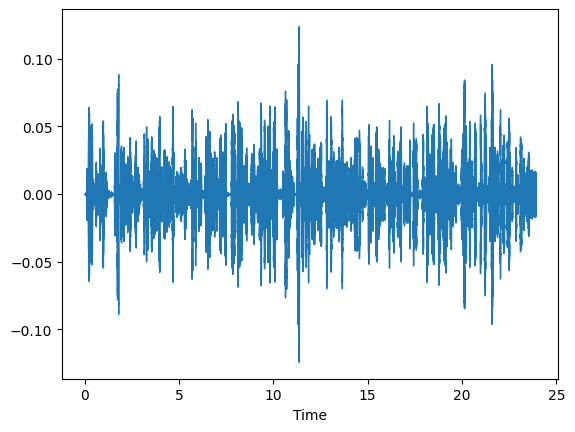

In [9]:
librosa.display.waveshow(audio_data[5])
plt.show()

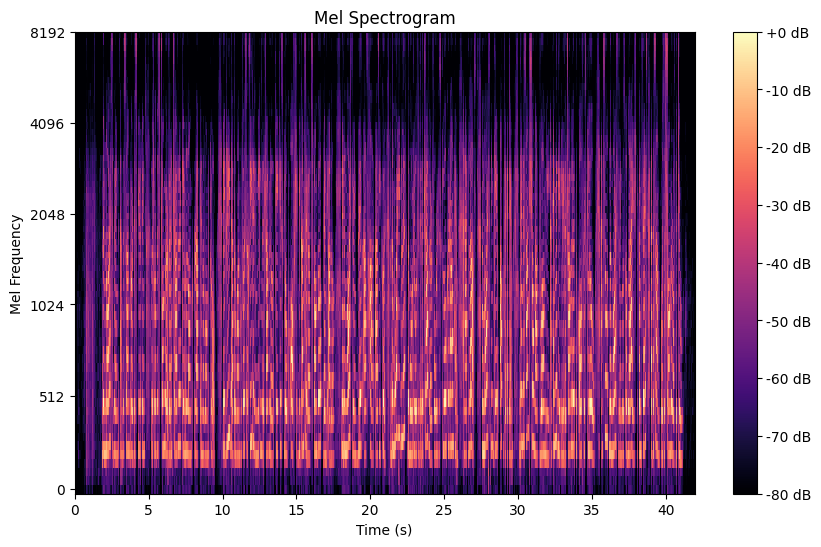

In [10]:
mel_spec = librosa.feature.melspectrogram(y=audio_data[50], sr=16000, n_mels=64, n_fft=1024, hop_length=512, window='hann')

# Convert to decibels (dB)
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

# Display the Mel spectrogram
plt.figure(figsize=(10, 6))
librosa.display.specshow(mel_spec_db, sr=sr, hop_length=512, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Mel Frequency')
plt.show()

In [11]:
df=pd.read_excel('/content/drive/MyDrive/MentalHealth-ONN/individual_data/SAD_Sorrow Analysis Dataset.xlsx')

In [12]:
print(df.columns)
values = df['Depression'].values

Index(['SPEAKER ID', 'GENDER', 'PHQ-score', 'BDI-score', 'Source',
       'Depression', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9'],
      dtype='object')


In [13]:
labels= df['Depression'].values
print(labels)

[1 1 0 1 0 0 1 1 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 1 2 1 0 0 1 1 0 2 0 0 0 1 1
 0 0 1 0 2 1 1 0 2 0 0 0 1 0 0 0 0 1 0 0 0 0 2 0 0 1 0]


In [14]:
import numpy as np
from scipy.io import wavfile
def segment_voice_recording(audio_path,segment_duration, overlap):
    audio, sr = librosa.load(audio_path, sr=None)
    segment_length = int(segment_duration * sr)
    overlap_length = int(segment_length * overlap)
    segments = []
    for i in range(0, len(audio) - segment_length + 1, segment_length - overlap_length):
        segment = audio[i:i+segment_length]
        segments.append(segment)
    return segments, sr

In [15]:
audio_paths = []
for i in range(1, 65):
    if i <= 9:
        audio_paths.append(f"/content/drive/MyDrive/MentalHealth-ONN/passage_1/0{i}_P1.wav")
    else:
        audio_paths.append(f"/content/drive/MyDrive/MentalHealth-ONN/passage_1/{i}_P1.wav")

In [16]:
all_segments=[]

for i in range(len(audio_paths)):
    all_segments.append(segment_voice_recording(audio_paths[i],segment_duration=5, overlap=0.5))

In [17]:
all_segments[25][1]

44100

In [18]:
all_segments_list = []
all_segments = list(all_segments)
for i in range(len(all_segments)):
    temp = []
    temp.append(all_segments[i][0])
    temp.append(all_segments[i][1])
    all_segments_list.append(temp)

all_segments = all_segments_list

In [19]:
segmented_sig=[]
sum=0
for i in range (len(all_segments)):
    all_segments[i][0] = np.array(all_segments[i][0])
    segmented_sig.append(all_segments[i][0])

for i in range (len(segmented_sig)):
    # print(segmented_sig[i].shape)
    sum+=segmented_sig[i].shape[0]

print(sum/len(segmented_sig))


15.78125


In [20]:
type(segmented_sig[62])

numpy.ndarray

In [21]:
import librosa

l=len(segmented_sig)

nfft=1024
win_length=1024
hop_length=410;sr=44100
audio_rgb_list_all=[]

d_shape=64


total_imgs=0 # to store total number of images from all the recordings co
labels_final=[]

import cv2 as cvlib
for j in range (l):
  r=len(segmented_sig[j])
  audio_rgb_list=[]




  for i in range(r):

    clip=segmented_sig[j][i]
    mel_spec=librosa.feature.melspectrogram( y=clip, sr=4000,n_mels=64, n_fft=1024, hop_length=410, win_length=1024, window='hann')
    log_spectrogram = librosa.amplitude_to_db(mel_spec)
    norm=(log_spectrogram-np.min(log_spectrogram))/(np.max(log_spectrogram)-np.min(log_spectrogram))
    img = norm
    img=cvlib.resize(img, dsize=(d_shape,d_shape), interpolation=cvlib.INTER_CUBIC)
    audio_rgb_list.append(img)

    labels_final.append(labels[j])


#   print(len(audio_rgb_list))
  total_imgs+= len(audio_rgb_list)
  audio_rgb_list_all.append(audio_rgb_list)

print('Total no. of images:' +str(total_imgs))
# x=np.array(audio_rgb_list_all)
# print('shape of prev spectrogram dataset'+str(np.shape(x)))
# X=np.reshape(x,(k,1,d_shape,d_shape))
# print('shape of one spectrogram dataset'+str(np.shape(X)))

Total no. of images:1010


In [22]:
labels_final

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,


In [23]:
audio_rgb_list_all

[[array([[ 0.        ,  0.        ,  0.        , ...,  0.5593419 ,
           0.382536  ,  0.9368747 ],
         [ 0.        ,  0.        ,  0.        , ...,  0.22362888,
           0.3519475 ,  0.8892889 ],
         [ 0.        ,  0.        ,  0.        , ..., -0.00411137,
           0.02746886,  0.03758132],
         ...,
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ]], dtype=float32),
  array([[ 0.5074647 ,  0.8779891 ,  0.82966286, ...,  0.07276832,
           0.7700277 ,  0.8526161 ],
         [ 0.31844056,  0.8031556 ,  0.59418476, ...,  0.02257754,
           0.29228625,  0.9156157 ],
         [ 0.        , -0.00773788,  0.01981484, ...,  0.        ,
           0.        ,  0.4004429 ],
         ...,
         [ 0.      

In [24]:
segmented_melspec=[] # to store the segmented melspecs as arrays in a list of arrays
sum=0

for i in range (len(audio_rgb_list_all)):
    audio_rgb_list_all[i]=np.array(audio_rgb_list_all[i])
    segmented_melspec.append(audio_rgb_list_all[i])

for i in range (len(segmented_melspec)):
    # print(segmented_sig[i].shape)
    sum+=segmented_melspec[i].shape[0]

print(sum/len(segmented_melspec))

15.78125


In [25]:
len(segmented_melspec[0][0])

64

In [26]:
melspec_data_arr=np.zeros((total_imgs,len(segmented_melspec[0][0]),len(segmented_melspec[0][0])))
k=0

for i in range (len(segmented_melspec)):
    for j in range (len(segmented_melspec[i])):

        melspec_data_arr[k]=segmented_melspec[i][j]
        k+=1
melspec_data_arr.shape

(1010, 64, 64)

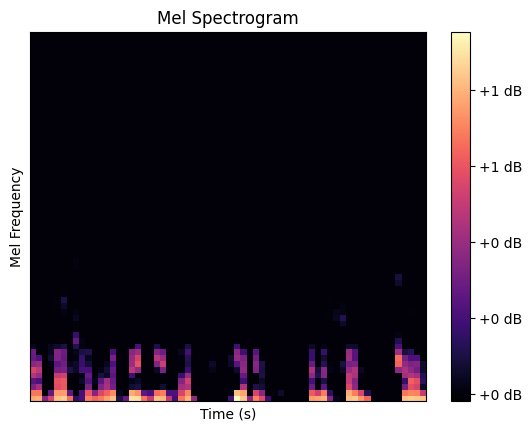

In [27]:
librosa.display.specshow(melspec_data_arr[314])
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Mel Frequency')
plt.show()

In [28]:
!git clone https://github.com/junaidmalik09/fastonn.git
%cd /content/fastonn
!pip install .
import fastonn
from fastonn import SelfONN2d

fatal: destination path 'fastonn' already exists and is not an empty directory.
/content/fastonn
Processing /content/fastonn
  Preparing metadata (setup.py) ... done
  Created wheel for fastonn: filename=fastonn-0.1.1-py3-none-any.whl size=299623 sha256=a8cb70f3e79055bbd5f4def7d5a5b8e0fd74255e12047388faa09817ddf4b3b0
  Stored in directory: /tmp/pip-ephem-wheel-cache-a4t1q1r7/wheels/1b/fb/0b/411fe15828f088e3036fc0f5f1fb6f7ed8f2eb6e7966a54199
Successfully built fastonn
  Attempting uninstall: fastonn
    Found existing installation: fastonn 0.1.1
    Uninstalling fastonn-0.1.1:
      Successfully uninstalled fastonn-0.1.1


In [29]:
X=np.reshape(melspec_data_arr,(melspec_data_arr.shape[0],1,len(segmented_melspec[0][0]),len(segmented_melspec[0][0])))
Y=np.array(labels_final)
X.shape

(1010, 1, 64, 64)

In [30]:
from sklearn.model_selection import train_test_split
def create_datasets(X, Y,test_size=0.15,seed=None):
    X_train1, X_test, y_train1, y_test = train_test_split(X, Y, test_size=0.1,random_state=seed)


    print(y_test.shape)
    # print(snr_list_test.shape)

    # X_train, X_valid, y_train, y_valid,snr_list_train, snr_list_valid = train_test_split(X_train1, y_train1,snr_list1, test_size=0.1,random_state=seed)
    X_train, X_valid, y_train, y_valid = train_test_split(X_train1, y_train1, test_size=0.1,random_state=seed)


    X_train, X_valid, X_test = [torch.tensor(arr, dtype=torch.float32) for arr in (X_train, X_valid, X_test)]
    y_train, y_valid, y_test = [torch.tensor(arr, dtype=torch.long) for arr in (y_train, y_valid, y_test)]


    train_ds = TensorDataset(X_train, y_train)
    valid_ds = TensorDataset(X_valid, y_valid)
    test_ds= TensorDataset(X_test, y_test)



    return train_ds, valid_ds, test_ds



In [31]:
def create_loaders(train_ds, valid_ds, test_ds,bs, jobs=0):
    train_dl = DataLoader(train_ds, bs, shuffle=True, num_workers=jobs)
    valid_dl = DataLoader(valid_ds, bs, shuffle=False, num_workers=jobs)
    test_dl = DataLoader(test_ds, bs, shuffle=False, num_workers=jobs)

    # snr_list_train_dl = DataLoader(snr_list_train_ds, bs, shuffle=True, num_workers=jobs)
    # snr_list_valid_dl = DataLoader(snr_list_valid_ds, bs, shuffle=False, num_workers=jobs)
    # snr_list_test_dl = DataLoader(snr_list_test_ds, bs, shuffle=False, num_workers=jobs)
    return train_dl, valid_dl,test_dl
    # ,snr_list_train_dl ,snr_list_valid_dl,snr_list_test_dl

In [32]:
print('Preparing datasets')
trn_ds, val_ds, tst_ds  = create_datasets(X,Y,seed=25)

Preparing datasets
(101,)


In [33]:
bs = 128
print(f'Creating data loaders with batch size: {bs}')
trn_dl, val_dl,tst_dl = create_loaders(trn_ds, val_ds,tst_ds, bs)

Creating data loaders with batch size: 128


In [40]:
from torchsummary import summary

class ONNNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.onnv1 = nn.Sequential(
            SelfONN2d(
                in_channels=1,
                out_channels=16,
                kernel_size=3,
                q=2
            ),
            nn.Tanh(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.onnv2 = nn.Sequential(
             SelfONN2d(
                in_channels=16,
                out_channels=16,
                kernel_size=3,
                q=2
            ),
            nn.Tanh(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.onnv3 = nn.Sequential(
            SelfONN2d(
                in_channels=16,
                out_channels=16,
                kernel_size=3,
                q=3
            ),
            nn.Tanh(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.onnv4 = nn.Sequential(
            SelfONN2d(
                in_channels=16,
                out_channels=32,
                kernel_size=3,
                q=3
            ),
            nn.Tanh(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.flatten = nn.Flatten()
        self.linear1 = nn.Linear(576, 250)  # Adjust the input size
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.5)
        self.linear2 = nn.Linear(250, 3)
        self.output_l = nn.Softmax(dim=1)

    def forward(self, input_data):
        x = self.onnv1(input_data)
        x = self.onnv2(x)
        # x = x+x1
        x =self.onnv3(x)
        # x = self.onnv3(x)
        x = self.flatten(x)
        embed = x
        x = self.linear1(x)
        x = self.relu(x)
        x = self.dropout(x)
        logits = self.linear2(x)
        predictions = self.output_l(logits)
        return logits, embed

device = torch.device('cpu')
model = ONNNetwork().to(device)
summary(model, (1, len(segmented_melspec[0][0]), len(segmented_melspec[0][0])))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
         SelfONN2d-1           [-1, 16, 62, 62]             304
              Tanh-2           [-1, 16, 62, 62]               0
         MaxPool2d-3           [-1, 16, 31, 31]               0
         SelfONN2d-4           [-1, 16, 29, 29]           4,624
              Tanh-5           [-1, 16, 29, 29]               0
         MaxPool2d-6           [-1, 16, 14, 14]               0
         SelfONN2d-7           [-1, 16, 12, 12]           6,928
              Tanh-8           [-1, 16, 12, 12]               0
         MaxPool2d-9             [-1, 16, 6, 6]               0
          Flatten-10                  [-1, 576]               0
           Linear-11                  [-1, 250]         144,250
             ReLU-12                  [-1, 250]               0
          Dropout-13                  [-1, 250]               0
           Linear-14                   

In [41]:
import torch.nn.functional as F

class SupConLoss(nn.Module):

    def __init__(self): # Corrected the typo here
        super().__init__()
        self.xent_loss = nn.CrossEntropyLoss()
        self.alpha = 0.5
        self.temp = 0.1

    def nt_xent_loss(self, anchor, target, labels):
        with torch.no_grad():
            labels = labels.unsqueeze(-1)
            mask = torch.eq(labels, labels.transpose(0, 1))
            mask = mask ^ torch.diag_embed(torch.diag(mask))

        anchor_dot_target = torch.einsum('bd,cd->bc', anchor, target) / self.temp

        anchor_dot_target = anchor_dot_target - torch.diag_embed(torch.diag(anchor_dot_target))

        logits_max, _ = torch.max(anchor_dot_target, dim=1, keepdim=True)
        logits = anchor_dot_target - logits_max.detach()

        exp_logits = torch.exp(logits)

        logits = logits * mask
        log_prob = logits - torch.log(exp_logits.sum(dim=1, keepdim=True) + 1e-12)

        mask_sum = mask.sum(dim=1)
        mask_sum = torch.where(mask_sum == 0, torch.ones_like(mask_sum), mask_sum)

        pos_logits = (mask * log_prob).sum(dim=1) / mask_sum.detach()
        loss = -1 * pos_logits.mean()
        return loss

    def forward(self, output, predicted, targets):
        normed_output = F.normalize(output, dim=-1)
        ce_loss = (1 - self.alpha) * self.xent_loss(predicted, targets)
        cl_loss = self.alpha * self.nt_xent_loss(normed_output, normed_output, targets)
        return cl_loss + ce_loss

In [42]:
import numpy as np

# Replace 'labels' or 'values' depending on which one represents the target labels
y_batch = labels  # or y_batch = values

# Check unique values and their range in y_batch
unique_targets = np.unique(y_batch)  # Removed .cpu().numpy()
print("Unique target values:", unique_targets)
print("Target value range:", unique_targets.min(), "to", unique_targets.max())

# Check the number of classes used during dataset creation
num_classes = len(unique_targets)
print("Number of classes in the dataset:", num_classes)

Unique target values: [0 1 2]
Target value range: 0 to 2
Number of classes in the dataset: 3


In [43]:
lr = 0.0005
# lr = 0.002

n_epochs = 250
iterations_per_epoch = len(trn_dl)

trainloss_history = []
valacc_history = []
valloss_history = []
trainacc_history=[]
criterion = nn.CrossEntropyLoss()
opt = torch.optim.Adam(model.parameters(), lr=lr)


print('Start model training')
loss_func = SupConLoss()

for epoch in range(1, n_epochs + 1):
    correct, total = 0, 0
    for i, (x_batch, y_batch) in enumerate(trn_dl):
        model.train()
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)
        opt.zero_grad()
        out_tr, embed = model(x_batch)
        loss_train = loss_func(embed, out_tr, y_batch) # loss_train is calculated here
        #loss =  criterion(out_tr, y_batch)
        preds_tr = F.log_softmax(out_tr, dim=1).argmax(dim=1)
        total += y_batch.size(0)
        correct += (preds_tr == y_batch).sum().item()
        loss_train.backward()
        opt.step()
    trainloss_history.append(loss_train.item()) # Change 'loss' to 'loss_train.item()'
    train_acc = correct / total
    trainacc_history.append(train_acc)
    with torch.no_grad():
        model.eval()
        correct, total = 0, 0
        for x_val, y_val in (val_dl):
            x_val=x_val.to(device)
            y_val = y_val.to(device)
            out_vl, embed = model(x_val)
            valid_loss = loss_func(embed, out_vl, y_val)
            preds = F.log_softmax(out_vl, dim=1).argmax(dim=1)
            total += y_val.size(0)
            correct += (preds == y_val).sum().item()
    valloss_history.append(valid_loss)
    valid_acc = correct / total
    valacc_history.append(valid_acc)
    print(f'Epoch: {epoch:3d}. Training Loss: {loss_train.item():.4f}. Validation Loss: {valid_loss:.4f}. Training Acc.: {train_acc:2.2%}  Validation Acc.: {valid_acc:2.2%}') # Also change here to loss_train.item()

Start model training
Epoch:   1. Training Loss: 2.3829. Validation Loss: 2.6827. Training Acc.: 55.38%  Validation Acc.: 59.34%
Epoch:   2. Training Loss: 2.3745. Validation Loss: 2.6808. Training Acc.: 54.89%  Validation Acc.: 59.34%
Epoch:   3. Training Loss: 2.4368. Validation Loss: 2.6833. Training Acc.: 53.55%  Validation Acc.: 59.34%
Epoch:   4. Training Loss: 2.3906. Validation Loss: 2.6801. Training Acc.: 55.50%  Validation Acc.: 59.34%
Epoch:   5. Training Loss: 2.3132. Validation Loss: 2.6785. Training Acc.: 55.01%  Validation Acc.: 59.34%
Epoch:   6. Training Loss: 2.4302. Validation Loss: 2.6792. Training Acc.: 55.13%  Validation Acc.: 59.34%
Epoch:   7. Training Loss: 2.3817. Validation Loss: 2.6799. Training Acc.: 55.26%  Validation Acc.: 59.34%
Epoch:   8. Training Loss: 2.3849. Validation Loss: 2.6788. Training Acc.: 55.38%  Validation Acc.: 59.34%
Epoch:   9. Training Loss: 2.3818. Validation Loss: 2.6771. Training Acc.: 55.50%  Validation Acc.: 59.34%
Epoch:  10. Trai

Text(0.5, 1.0, 'Loss')

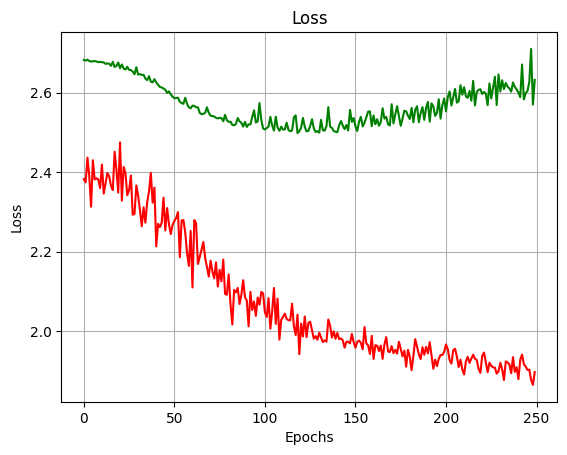

In [44]:
val_loss=torch.tensor(valloss_history,device = 'cpu')
val_loss_np=val_loss.numpy()
train_loss=torch.tensor(trainloss_history,device = 'cpu')
train_loss_np=train_loss.numpy()
plt.plot(val_loss_np,'g');plt.plot(train_loss_np,'r');plt.grid();
plt.ylabel('Loss');plt.xlabel('Epochs')
plt.title("Loss")

Text(0.5, 1.0, 'Validation Accuracy')

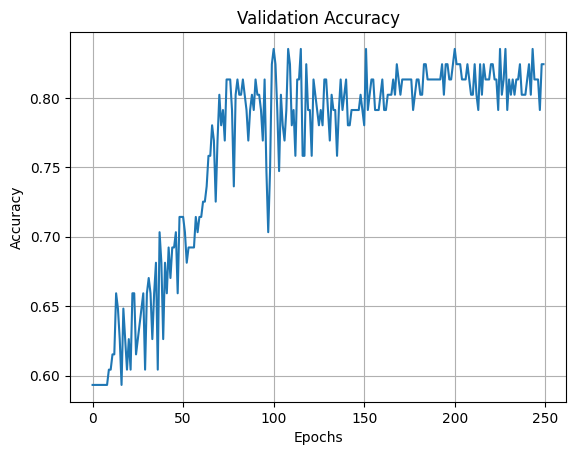

In [45]:
valid_acch=np.array(valacc_history)
plt.plot(valid_acch);plt.grid();
plt.ylabel('Accuracy');plt.xlabel('Epochs')
plt.title("Validation Accuracy")

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

y_true = []
y_pred = []
model.eval()
for x_test, y_tst in (tst_dl):
    x_test=x_test.to(device) # Change from .cuda() to .to(device) to utilize the assigned device
    out_test, _ = model(x_test)
    y_hat = F.log_softmax(out_test, dim=1).argmax(dim=1)
    y_hat=y_hat.data.cpu().numpy()
    y_pred.extend(y_hat) # Save preds

    y_tst = y_tst.data.cpu().numpy()
    y_true.extend(y_tst) # Save Truth


from sklearn.metrics import confusion_matrix
import seaborn as sns;
cm=confusion_matrix(y_true,y_pred)
Acc=cm.trace()/np.sum(cm)
print('Test accuracy is = '+str(Acc*100)+'%')
cm_norm=confusion_matrix(y_true,y_pred,normalize='true')

Test accuracy is = 79.20792079207921%


In [47]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import torch

# Assuming tst_dl is your test dataloader
# Extract x_test and y_test from tst_dl
x_test, y_test = next(iter(tst_dl))

y_true = []
y_pred = []
# Move x_test to the appropriate device before passing it to the model
x_test = x_test.to(device)

# Pass the entire x_test batch to the model
outputs = model(x_test)

# Assuming outputs is a tuple, select the first element which should contain the logits
# Replace 0 with the appropriate index if the logits are stored in a different position within the tuple
logits = outputs[0]

# Get the predicted class labels by selecting the index of the maximum output
_, predicted = torch.max(logits, 1)  # Pass the logits tensor instead of the tuple

# Convert the predicted tensor to a list and store it in y_pred
y_pred.extend(predicted.cpu().numpy())

# Convert the true labels tensor to a list and store it in y_true
y_true.extend(y_test.cpu().numpy())

# Print the predicted class labels (y_pred)
print("Predicted class labels:", y_pred)

Predicted class labels: [1, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 2, 1, 1, 2, 1, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 2, 1, 0, 1, 0, 0, 2, 0, 1, 0, 1, 0, 1, 1, 1, 1]
